In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

Load the camera matrix and distortion.

In [10]:
R_cam = np.load("Cameramatrix_R.npy")
L_cam = np.load("Cameramatrix_L.npy")
R_dist = np.load("Dist_R.npy")
L_dist = np.load("Dist_L.npy")
R_rvec = np.load("rvec_R.npy")
L_rvec = np.load("rvec_L.npy")
R_tvec = np.load("tvec_R.npy")
L_tvec = np.load("tvec_L.npy")

Load Right Image and Draw its corner

In [11]:
# Defining the dimensions of checkerboard
CHECKERBOARD = (8,6)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 24, 0.001)

# Creating vector to store vectors of 3D points for each checkerboard image
objpoints1 = []
objpoints2 = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints1 = []
imgpoints2 = [] 


# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0]*CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None

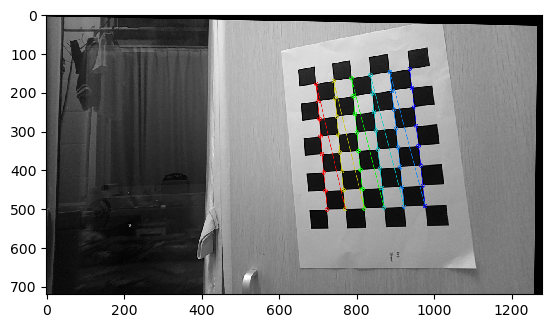

In [12]:
fname = "frame_0000_left.jpg"
img = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
objpoints1.append(objp)
imgpoints1.append(corners2)
img1 = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
plt.imshow(img1)
plt.show()

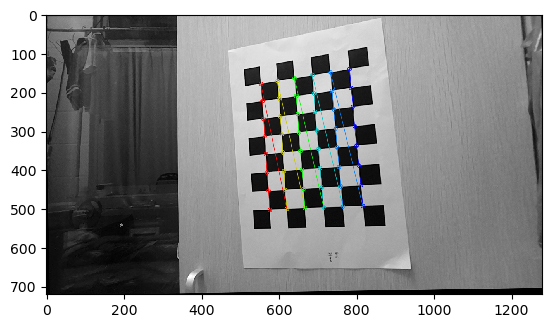

In [13]:
fname = "frame_0000_right.jpg"
img = cv2.imread(fname)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, CHECKERBOARD, cv2.CALIB_CB_ADAPTIVE_THRESH+
    	cv2.CALIB_CB_FAST_CHECK+cv2.CALIB_CB_NORMALIZE_IMAGE)
corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
objpoints2.append(objp)
imgpoints2.append(corners2)
img2 = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)
plt.imshow(img2)
plt.show()

Draw Right Corners to Left Picture

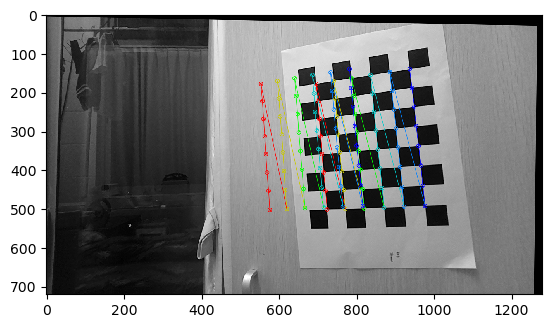

In [14]:
points3d_l = objpoints1[0]
points3d_r = objpoints2[0]
corners_l = imgpoints1[0]
corners_r = imgpoints2[0]
img_l = img1
img_r = img2
img_hybrid = cv2.drawChessboardCorners(img_l, CHECKERBOARD, corners_r, True)
plt.imshow(img_hybrid)
plt.show()

When we know the corners_r, 

In [15]:
# calculate the [Xc1,Yc1,Zc1]
for i in range(np.shape(corners_r)[0]):
    # knowing u, v calculate Pc
    u = corners_r[i][0][0]
    v = corners_r[i][0][1]
    Pc_r = np.linalg.inv(R_cam)@(np.array([u,v,1]).reshape((3,1)))
    # knowing Pw calculate Pw
    R = np.zeros((3,3))
    cv2.Rodrigues(R_rvec, R)
    Pc_r_ = R@(points3d_l[0][i]).reshape((3,1))+R_tvec.reshape((3,1))
    # Pc_r == Pc_r_/Pc_r_[-1]